<a href="https://colab.research.google.com/github/kowshalyagp/Solar-power-prediction-using-machine-learning/blob/main/solar%20power%20prediction%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement:

Solar power generation fluctuates with weather conditions (sunlight, temperature, cloud cover, etc.),
making energy planning challenging. The goal is to build a machine learning model
that predicts solar power output given environmental factors.


Dataset Preview:
   Sunlight_Hours  Temperature  Cloud_Cover  Panel_Angle  Humidity  \
0              10           33           60           37        58   
1               7           22           99           16        53   
2               8           21           88           37        48   
3              10           30           99           26        68   
4               6           33           30           14        67   

   Wind_Speed  Power_Output_Watts  
0          19          438.891868  
1           7          135.637576  
2          14          223.568320  
3          14          280.550908  
4          15          254.501533  

Data Summary:
       Sunlight_Hours  Temperature   Cloud_Cover   Panel_Angle 

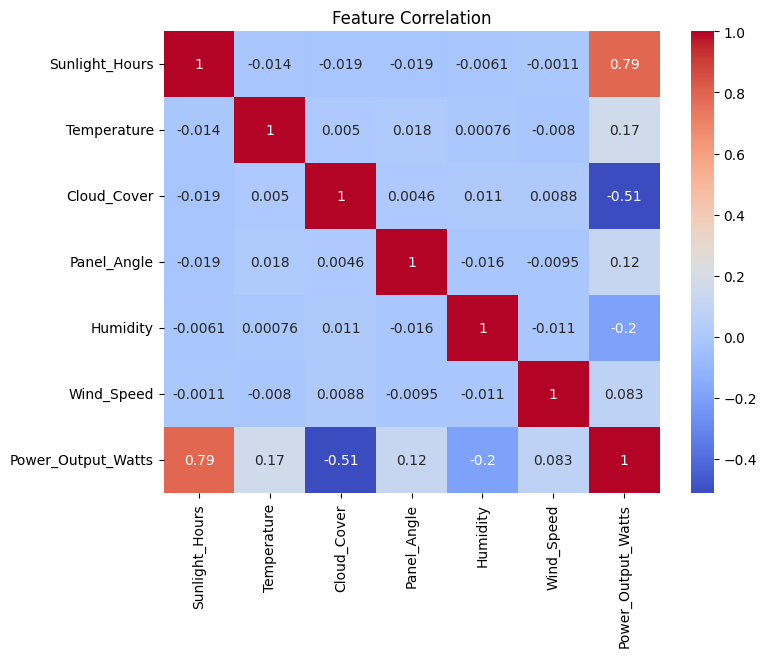

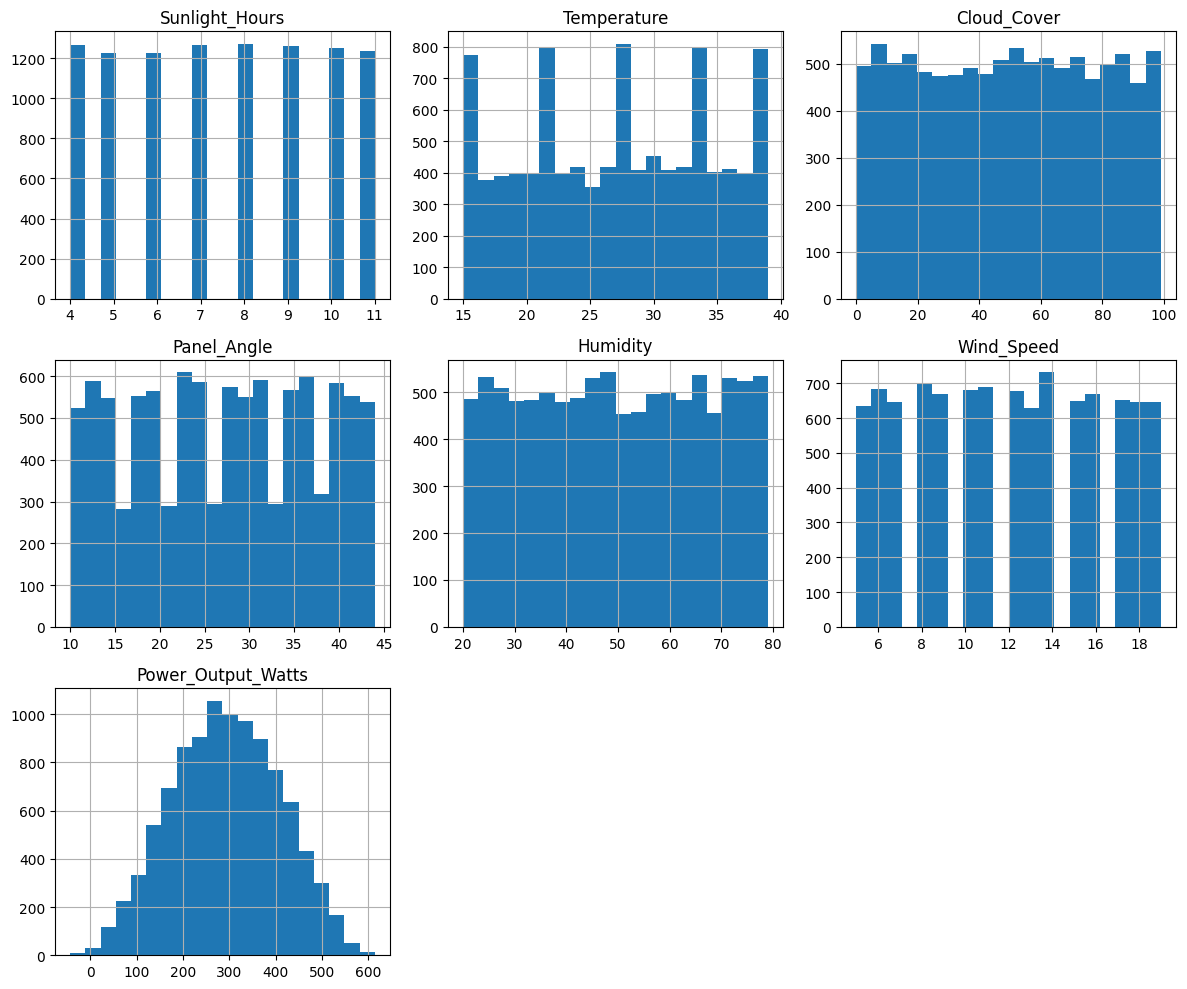


Missing values in dataset:
 Sunlight_Hours        0
Temperature           0
Cloud_Cover           0
Panel_Angle           0
Humidity              0
Wind_Speed            0
Power_Output_Watts    0
dtype: int64

Training samples: 8000, Testing samples: 2000

Model Evaluation Metrics:
                         R2        MAE         MSE  MAPE (%)
Linear Regression  0.969134  16.211350  411.573000  7.514217
Random Forest      0.957733  19.021787  563.591236  9.461613
Gradient Boosting  0.964799  17.354958  469.373000  8.306582


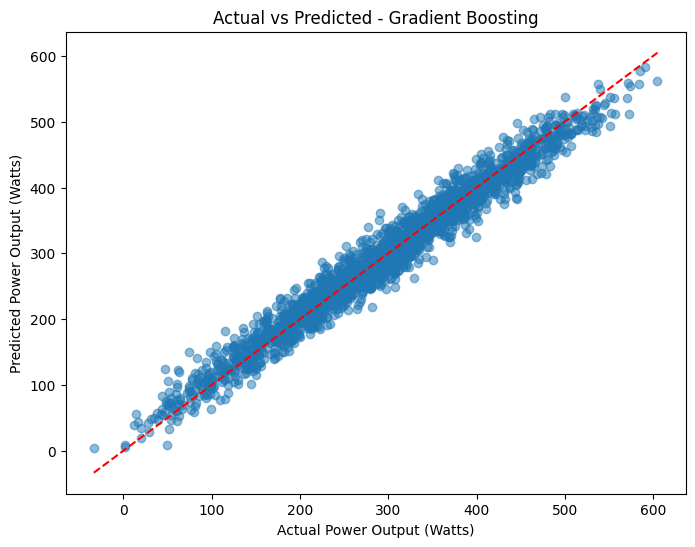


Final Model (Gradient Boosting) Evaluation on Test Data:
R² Score: 0.9648
MAE: 17.35
MSE: 469.37
MAPE: 8.31%

🌞 Solar Power Prediction - Enter Inputs to Predict 🌞


In [ ]:
# ================================
# Solar Power Prediction Project
# Internship Week 1-2
# Fully Merged Notebook
# ================================

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# %matplotlib inline  # (needed in Jupyter, not in .py script)

# 2. Define the Problem
print("Problem Statement:")
print("""
Solar power generation fluctuates with weather conditions (sunlight, temperature, cloud cover, etc.),
making energy planning challenging. The goal is to build a machine learning model
that predicts solar power output given environmental factors.
""")

# 3. Data Collection & Understanding
np.random.seed(42)
n_samples = 10000

# Synthetic dataset simulating solar power data
data = {
    "Sunlight_Hours": np.random.randint(4, 12, n_samples),
    "Temperature": np.random.randint(15, 40, n_samples),
    "Cloud_Cover": np.random.randint(0, 100, n_samples),
    "Panel_Angle": np.random.randint(10, 45, n_samples),
    "Humidity": np.random.randint(20, 80, n_samples),
    "Wind_Speed": np.random.randint(5, 20, n_samples),
}

df = pd.DataFrame(data)
df["Power_Output_Watts"] = (
    df["Sunlight_Hours"]*40 + df["Temperature"]*3
    - df["Cloud_Cover"]*2 + df["Panel_Angle"]*1.5
    - df["Humidity"]*1.2 + df["Wind_Speed"]*2.5
    + np.random.normal(0, 20, n_samples)
)

print("\nDataset Preview:")
print(df.head())

# 4. Data Understanding
print("\nData Summary:")
print(df.describe())

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

# Feature Distributions
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

# 5. Data Preprocessing
print("\nMissing values in dataset:\n", df.isnull().sum())

# 6. Data Splitting
X = df.drop("Power_Output_Watts", axis=1)
y = df["Power_Output_Watts"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

# 7. Algorithm Selection & Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    results[name] = {
        "R2": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "MAPE (%)": mape,
    }

print("\nModel Evaluation Metrics:")
print(pd.DataFrame(results).T)

# 8. Model Evaluation - Actual vs Predicted
best_model = models["Gradient Boosting"]
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Power Output (Watts)")
plt.ylabel("Predicted Power Output (Watts)")
plt.title("Actual vs Predicted - Gradient Boosting")
plt.show()

# 9. Model Optimization
# Already using robust models with appropriate parameters for demonstration
# For real-world projects, hyperparameter tuning (GridSearchCV) can be applied

# 10. Final Model Evaluation on Test Data
y_pred_final = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred_final)
mae = mean_absolute_error(y_test, y_pred_final)
mse = mean_squared_error(y_test, y_pred_final)
mape = np.mean(np.abs((y_test - y_pred_final) / y_test)) * 100

print("\nFinal Model (Gradient Boosting) Evaluation on Test Data:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"MAPE: {mape:.2f}%")

# 11. Model Deployment - Interactive Prediction in Notebook
print("\n🌞 Solar Power Prediction - Enter Inputs to Predict 🌞")
sunlight = float(input("Sunlight Hours (4-12): "))
temperature = float(input("Temperature (°C, 15-40): "))
cloud = float(input("Cloud Cover (% 0-100): "))
angle = float(input("Panel Angle (° 10-45): "))
humidity = float(input("Humidity (%) 20-80): "))
wind = float(input("Wind Speed (km/h) 5-20): "))

user_input = pd.DataFrame(
    [[sunlight, temperature, cloud, angle, humidity, wind]],
    columns=["Sunlight_Hours", "Temperature", "Cloud_Cover", "Panel_Angle", "Humidity", "Wind_Speed"]
)

prediction = best_model.predict(user_input)[0]
print(f"\n🔋 Predicted Solar Power Output: {prediction:.2f} Watts")